In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import torch
import torch_geometric

# Utilities

In [2]:
# custom violin plot functions from https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels, x_label='RNA', y_label='RMSD'):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_xlim(0.25, len(labels) + 0.75)
    plt.yticks(fontsize=16)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)


# RMSD values per RNA

In validation set are RNAs: 1a4d, 1i9x, 1kka and 1q9a.

In [3]:
val = ['1a4d', '1kka', '1i9x', '1q9a']

In [3]:
# These values were obtained in one run of the algorithm, so first they need to be properly preprocessed
with open('/home/martinovici/scratch/GNN_project/data/analysis/rmsds.pkl', 'rb') as f:
    rmsds = pickle.load(f)
RMSDs = {}

for key in rmsds:
    rna = key[2:6]
    if rna not in RMSDs:
        RMSDs[rna] = []
    RMSDs[rna].append(rmsds[key])

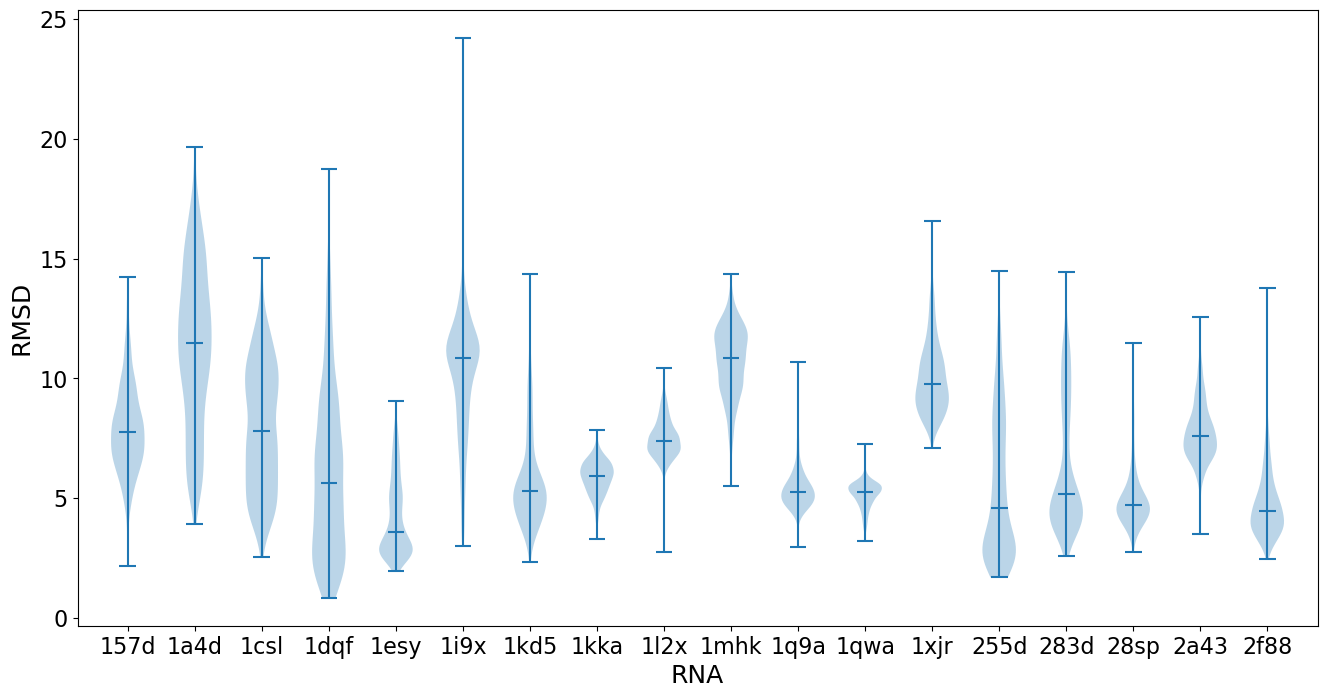

In [29]:
violin_list = []
RNAs = sorted(RMSDs.keys())
for rna in RNAs:
    cur = RMSDs[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111) 
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, RNAs)
plt.show()

In [6]:
## all values
values = []
for rna in RMSDs:
    values.extend(RMSDs[rna])

print('min =', np.min(values))
print('max =', np.max(values))
print('median =', np.median(values))
print('mean =', np.mean(values))
print('std =', np.std(values))

min = 0.843
max = 24.227
median = 6.512
mean = 7.082867
std = 2.9853172137014368


In [54]:
with open('/home/martinovici/scratch/GNN_project/data/processed/train_graphs.pkl', 'rb') as f:
    train_data_list = pickle.load(f)
with open('/home/martinovici/scratch/GNN_project/data/processed/val_graphs.pkl', 'rb') as f:
    val_data_list = pickle.load(f)

In [55]:
train_rmsds = {}
for d in train_data_list:
    rna = d.id[2:6]
    if rna not in train_rmsds:
        train_rmsds[rna] = []
    train_rmsds[rna].append(d.label.item())

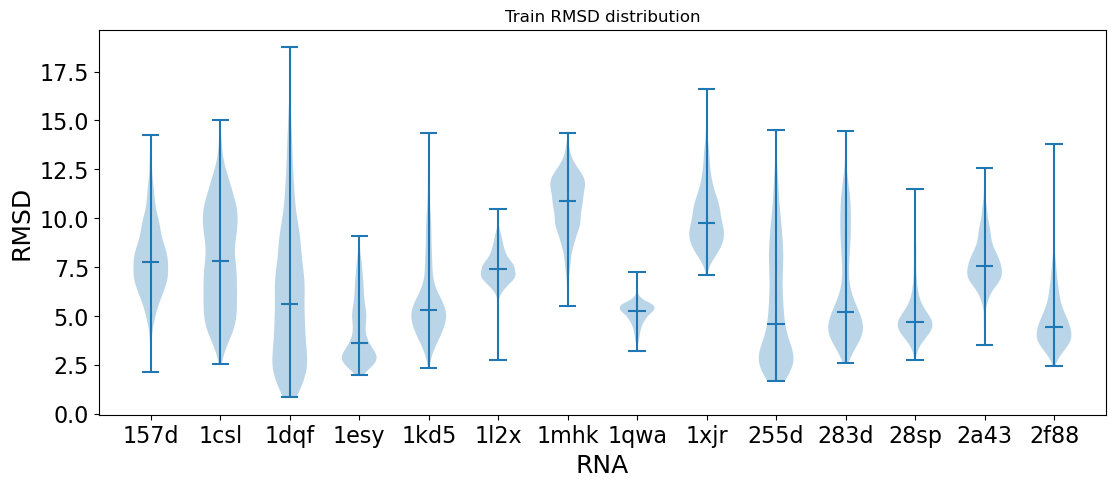

In [22]:
violin_list = []
RNAs = sorted(train_rmsds.keys())
for rna in RNAs:
    cur = train_rmsds[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111) 
ax.set_title('Train RMSD distribution')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, RNAs)
plt.show()

In [56]:
val_rmsds = {}
for d in val_data_list:
    rna = d.id[2:6]
    if rna not in val_rmsds:
        val_rmsds[rna] = []
    val_rmsds[rna].append(d.label.item())

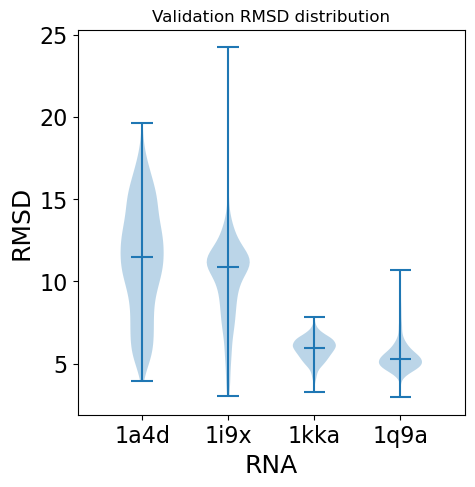

In [23]:
violin_list = []
RNAs = sorted(val_rmsds.keys())
for rna in RNAs:
    cur = val_rmsds[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111) 
ax.set_title('Validation RMSD distribution')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, RNAs)
plt.show()

## New shuffle of train and validation set

In [11]:
val = ['1csl', '1dqf', '1qwa', '28sp']

In [13]:
with open('/home/martinovici/scratch/GNN_project/data/processed/new_train_graphs.pkl', 'rb') as f:
    new_train_data_list = pickle.load(f)
with open('/home/martinovici/scratch/GNN_project/data/processed/new_val_graphs.pkl', 'rb') as f:
    new_val_data_list = pickle.load(f)

In [30]:
new_train_rmsds = {}
for d in new_train_data_list:
    rna = d.id[:4]
    if rna not in new_train_rmsds:
        new_train_rmsds[rna] = []
    new_train_rmsds[rna].append(d.label.item())

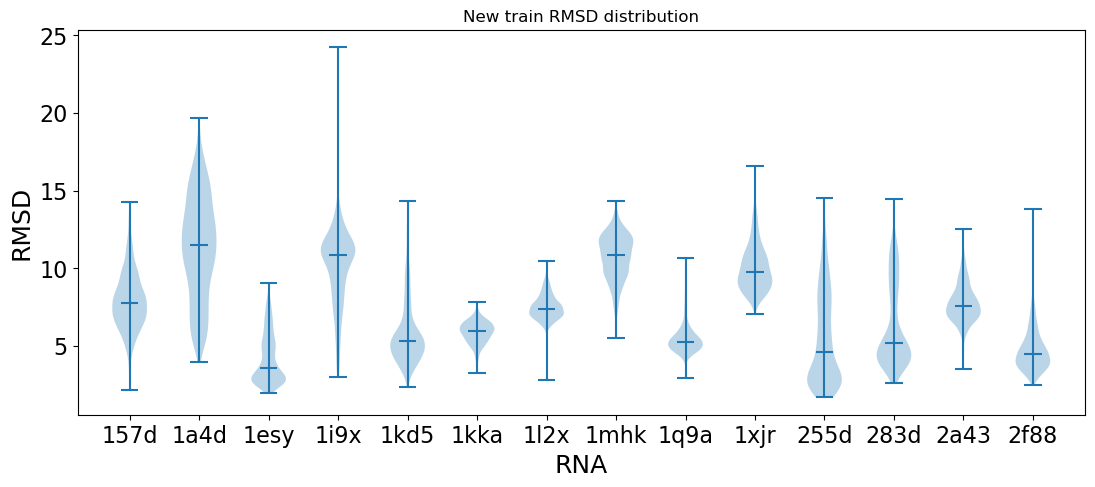

In [31]:
violin_list = []
RNAs = sorted(new_train_rmsds.keys())
for rna in RNAs:
    cur = new_train_rmsds[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111) 
ax.set_title('New train RMSD distribution')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, RNAs)
plt.show()

In [33]:
new_val_rmsds = {}
for d in new_val_data_list:
    rna = d.id[:4]
    if rna not in new_val_rmsds:
        new_val_rmsds[rna] = []
    new_val_rmsds[rna].append(d.label.item())

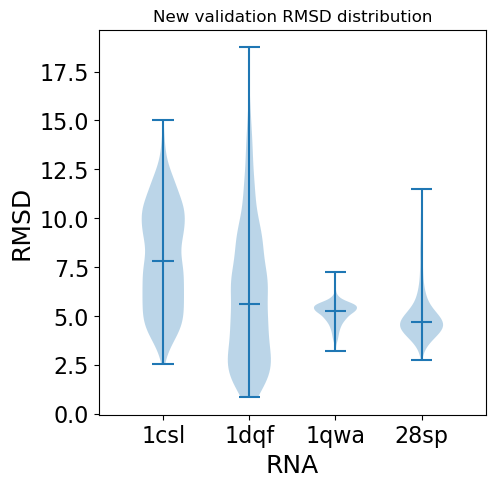

In [34]:
violin_list = []
RNAs = sorted(new_val_rmsds.keys())
for rna in RNAs:
    cur = new_val_rmsds[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111) 
ax.set_title('New validation RMSD distribution')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, RNAs)
plt.show()

# Chosing an evaluation dataset 

In [13]:
# loading data from benchmark results from ARES paper
benchmark = pd.read_csv('/home/martinovici/scratch/GNN_project/data/analysis/benchmark1.csv', dtype={'puzzle_number': object})
benchmark

,ares,rms,rosetta,tag,source,puzzle_number,3drnascore,rasp
0,7.576193,12.427,106.297,S_000002_183,decoys,15,21.9149,-27553.5
1,7.672672,10.730,152.536,S_000003_239,decoys,15,22.4963,-25670.3
2,8.025086,10.366,151.115,S_000007_074,decoys,15,22.0281,-28136.4
3,8.053055,13.913,145.586,S_000003_105,decoys,15,22.8792,-21628.6
4,8.190638,9.547,148.252,S_000012_029,decoys,15,22.7635,-25943.1
...,...,...,...,...,...,...,...,...
428190,7.713953,0.000,1393.058,rna_puzzle_10_NATIVE_10_0_solution_4LCK_rpr,native,10,24.3564,-69060.8
428191,8.055845,0.000,67.581,rna_puzzle_9_2xnw_NATIVE_5kpy,native,9,22.4335,-28408.8
428192,6.724915,0.000,-26.694,rna_puzzle_21_NATIVE_21_5nwq_solution_0_rpr,native,21,19.8853,-17529.5
428193,7.094471,0.000,89.403,rna_puzzle_11_NATIVE,native,11,20.4780,-27989.7


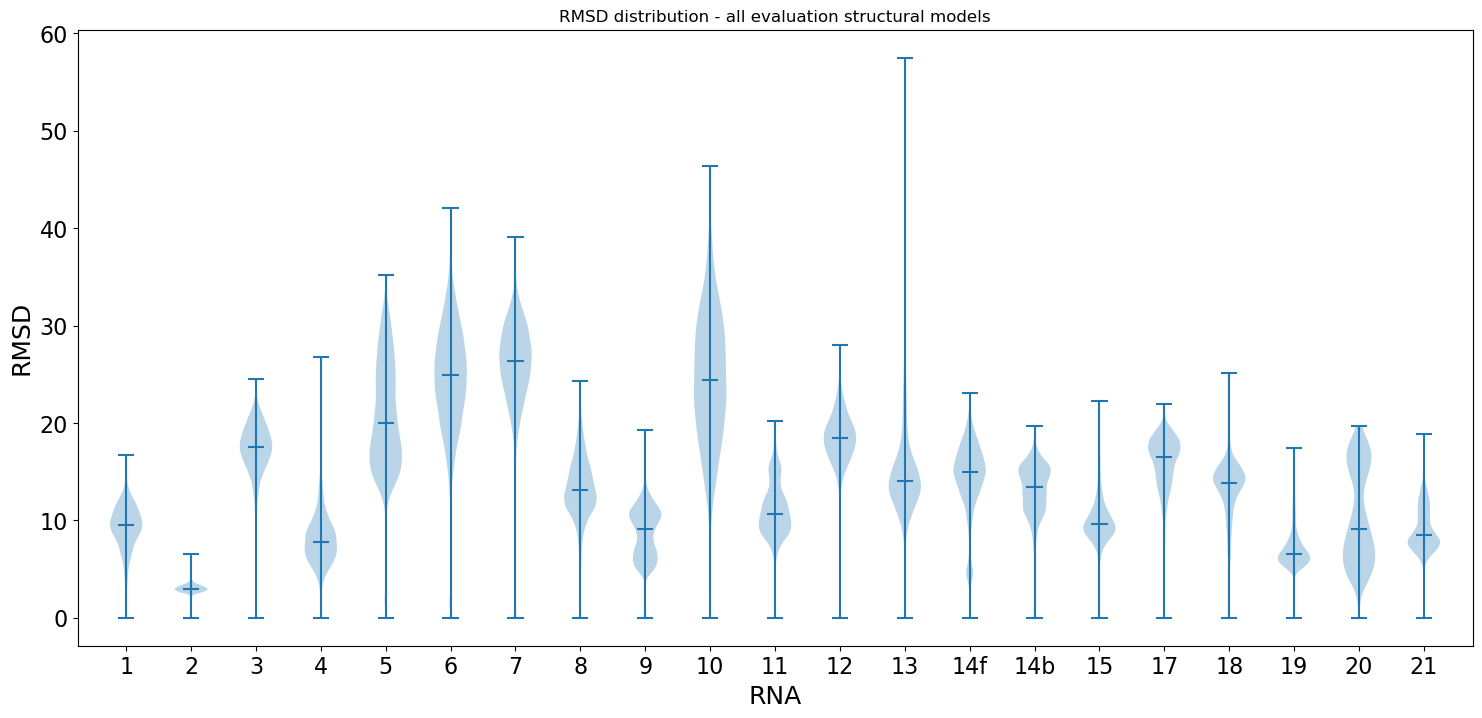

In [14]:
puzzles = sorted(benchmark["puzzle_number"].unique(), key=lambda x: int(x) if len(x) == 1 else int(x[:2]))
puzzle_rmsds = []
for p in puzzles:
    selected = benchmark[benchmark["puzzle_number"] == p]
#    print(p, len(selected["rms"]))
    puzzle_rmsds.append(selected["rms"].to_list())

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111) 
ax.violinplot(puzzle_rmsds, showmedians=True)
set_axis_style(ax, puzzles)
ax.set_title('RMSD distribution - all evaluation structural models')
plt.show()

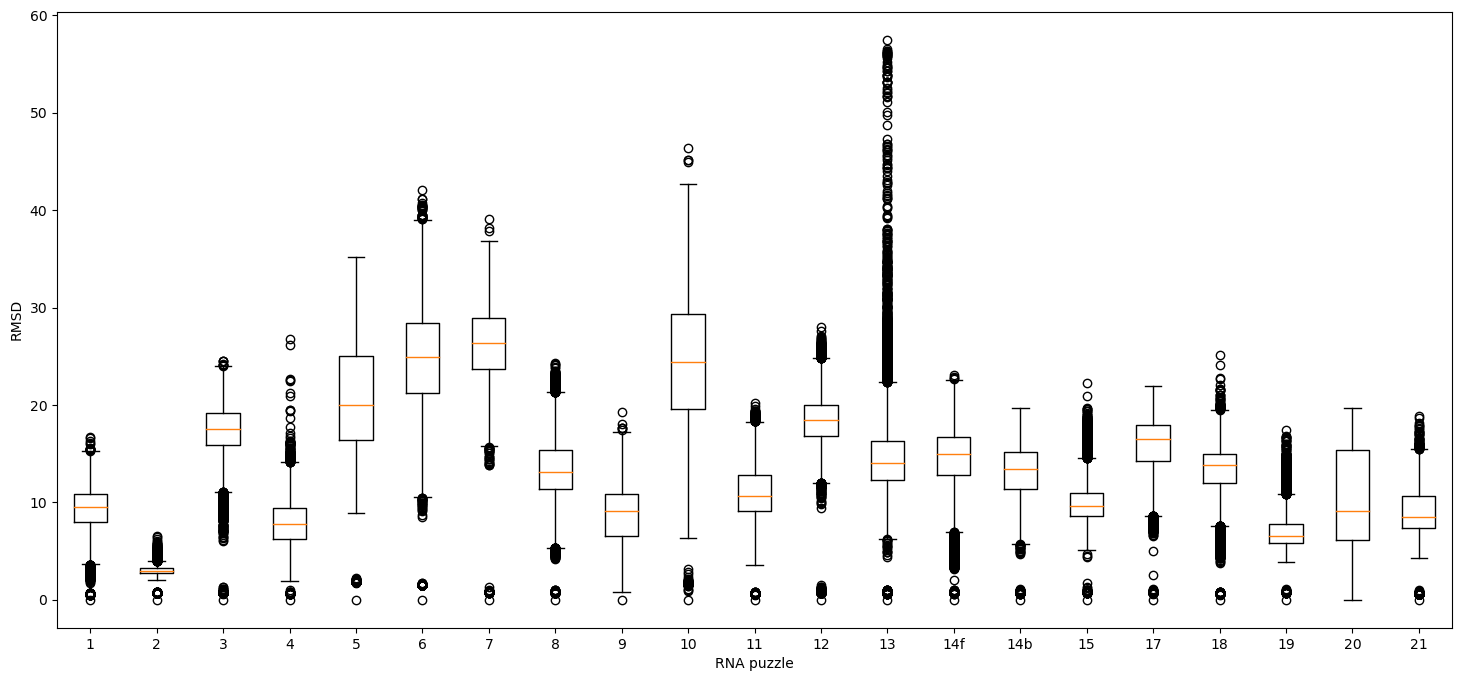

In [16]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111) 
ax.boxplot(puzzle_rmsds, labels=puzzles)
plt.xlabel('RNA puzzle')
plt.ylabel('RMSD')
plt.show()

### Randomly chosen evaluation files

For each puzzle 1 native file, 9 near-native files and 990 decoys - in total 1000 structural models.

In [7]:
with open('/home/martinovici/scratch/GNN_project/data/processed/eval.pkl', 'rb') as f:
    eval_data_list = pickle.load(f)

In [8]:
eval_rmsds = {}
for d in eval_data_list:
    puzzle = d.id.split('_')[2]
    if puzzle not in eval_rmsds:
        eval_rmsds[puzzle] = []
    eval_rmsds[puzzle].append(d.label.item())

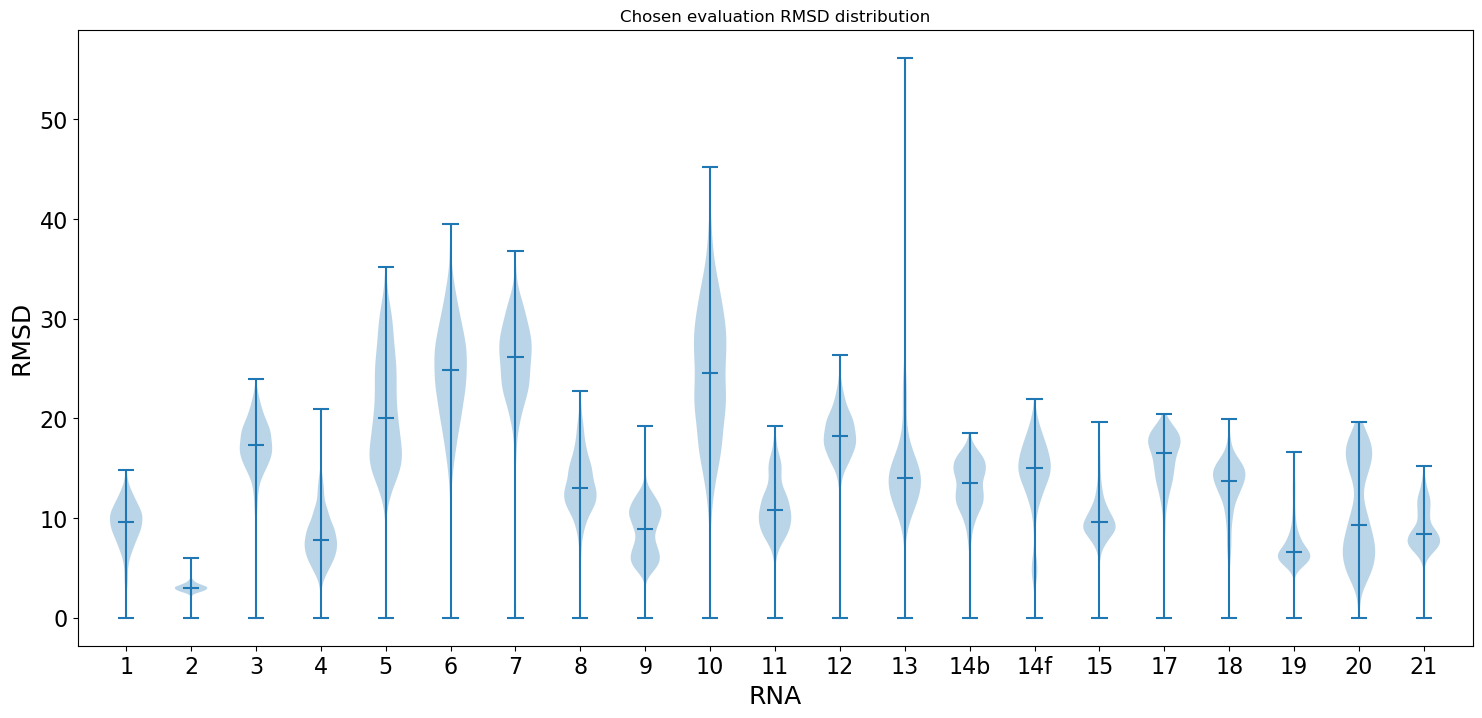

In [11]:
violin_list = []
puzzles = sorted(eval_rmsds.keys(), key=lambda x: int(x) if len(x) == 1 else int(x[:2]))
for p in puzzles:
    cur = eval_rmsds[p]
    violin_list.append(cur)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111) 
ax.set_title('Chosen evaluation RMSD distribution')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, puzzles)
plt.show()

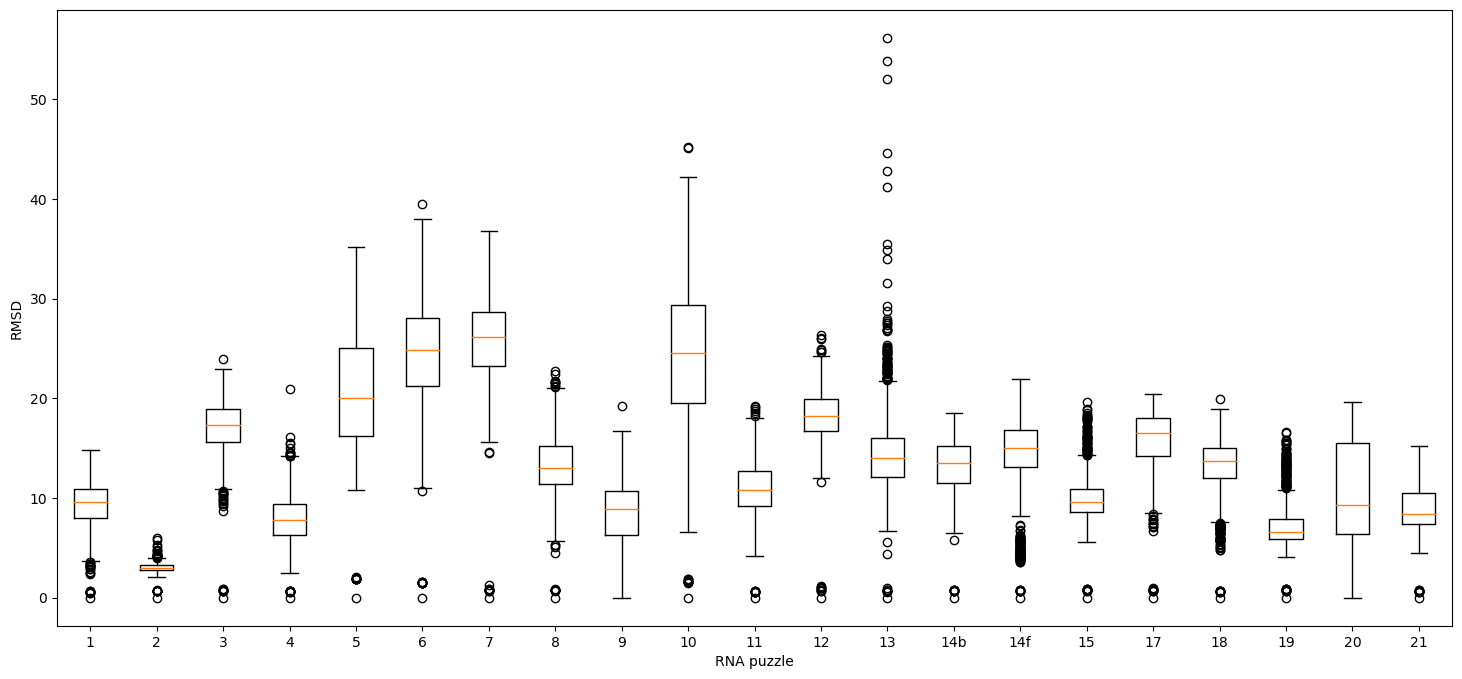

In [10]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111) 
ax.boxplot(violin_list, labels=puzzles)
plt.xlabel('RNA puzzle')
plt.ylabel('RMSD')
plt.show()

In [9]:
## all values
values = []
for rna in eval_rmsds:
    values.extend(eval_rmsds[rna])

print('min =', np.min(values))
print('max =', np.max(values))
print('median =', np.median(values))
print('mean =', np.mean(values))
print('std =', np.std(values))

min = 0.0
max = 56.177
median = 13.134
mean = 13.903369809523808
std = 7.040720258258414


# Number of nodes/edges

In [14]:
with open('/home/martinovici/scratch/GNN_project/data/processed/train_graphs.pkl', 'rb') as f:
    train_data_list = pickle.load(f)
with open('/home/martinovici/scratch/GNN_project/data/processed/val_graphs.pkl', 'rb') as f:
    val_data_list = pickle.load(f)   

In [43]:
num_nodes = {}
num_edges = {}

for d in train_data_list:
    rna = d.id[2:6]
    num_nodes[rna] = d.x.shape[0]
    num_edges[rna] = d.edge_attr.shape[0]

for d in val_data_list:
    rna = d.id[2:6]
    num_nodes[rna] = d.x.shape[0]
    num_edges[rna] = d.edge_attr.shape[0]

print('Number of nodes per RNA:\n', num_nodes)
print('Number of edges per RNA:\n', num_edges)
flag = True
for rna in num_nodes:
    if num_edges[rna] != num_nodes[rna] * 50:
        flag = False
print('Number of edges should be number of nodes * 50, is it:', flag)

Number of nodes per RNA:
 {'157d': 486, '1csl': 567, '1dqf': 380, '1esy': 388, '1kd5': 438, '1l2x': 574, '1mhk': 638, '1qwa': 420, '1xjr': 965, '255d': 478, '283d': 492, '28sp': 577, '2a43': 526, '2f88': 695, '1a4d': 839, '1i9x': 520, '1kka': 345, '1q9a': 552}
Number of edges per RNA:
 {'157d': 24300, '1csl': 28350, '1dqf': 19000, '1esy': 19400, '1kd5': 21900, '1l2x': 28700, '1mhk': 31900, '1qwa': 21000, '1xjr': 48250, '255d': 23900, '283d': 24600, '28sp': 28850, '2a43': 26300, '2f88': 34750, '1a4d': 41950, '1i9x': 26000, '1kka': 17250, '1q9a': 27600}
Number of edges should be number of nodes * 50, is it: True


In [38]:
values = list(num_nodes.values())
print('min =', np.min(values))
print('max =', np.max(values))
print('median =', np.median(values))
print('mean =', np.mean(values))
print('std =', np.std(values))

min = 345
max = 965
median = 523.0
mean = 548.8888888888889
std = 153.9884154693639


In [30]:
import networkx as nx
G = torch_geometric.utils.convert.to_networkx(train_data_list[0])
G

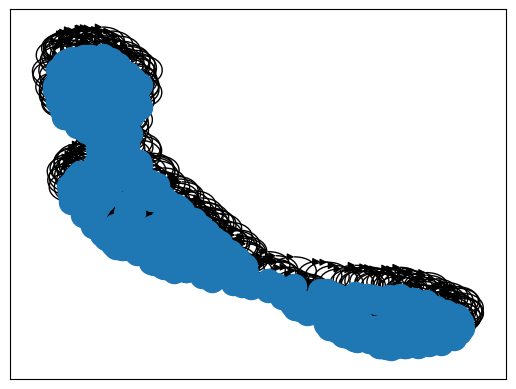

In [33]:
nx.draw_networkx(G, with_labels=False)
plt.show()

In [40]:
# eval
with open('/home/martinovici/scratch/GNN_project/data/processed/eval.pkl', 'rb') as f:
    puzzles_list = pickle.load(f)

In [42]:
num_nodes_eval = {}
num_edges_eval = {}

for d in puzzles_list:
    parts = d.id.split('_')
    p = parts[2]
    num_nodes_eval[p] = d.x.shape[0]
    num_edges_eval[p] = d.edge_attr.shape[0]


print('Number of nodes per puzzle:\n', num_nodes_eval)
print('Number of edges per puzzle:\n', num_edges_eval)
flag = True
for p in num_nodes_eval:
    if num_edges_eval[p] != num_nodes_eval[p] * 50:
        flag = False
print('Number of edges should be number of nodes * 50, is it:', flag)

Number of nodes per puzzle:
 {'10': 3209, '11': 1149, '12': 2389, '13': 1229, '14b': 1246, '14f': 1176, '15': 1385, '17': 1174, '18': 1453, '19': 1257, '1': 926, '20': 1379, '21': 840, '2': 2012, '3': 1720, '4': 2575, '5': 3823, '6': 3242, '7': 3768, '8': 1975, '9': 1439}
Number of edges per puzzle:
 {'10': 160450, '11': 57450, '12': 119450, '13': 61450, '14b': 62300, '14f': 58800, '15': 69250, '17': 58700, '18': 72650, '19': 62850, '1': 46300, '20': 68950, '21': 42000, '2': 100600, '3': 86000, '4': 128750, '5': 191150, '6': 162100, '7': 188400, '8': 98750, '9': 71950}
Number of edges should be number of nodes * 50, is it: True


In [44]:
values = list(num_nodes_eval.values())
print('min =', np.min(values))
print('max =', np.max(values))
print('median =', np.median(values))
print('mean =', np.mean(values))
print('std =', np.std(values))

min = 840
max = 3823
median = 1439.0
mean = 1874.5714285714287
std = 909.2504799966563


# Model outputs analysis per train RNA

In [45]:
df1 = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/gcn_2layers_org_train.csv')
df2 = pd.read_csv('/home/martinovici/scratch/GNN_project/data/eval_results/gcn_2layers_org_val.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

,id,file_path,rms,out
0,"('2f88', 'S_002514_minimize_003')",/oak/stanford/groups/rondror/projects/ppi/rna/...,4.312,6.241663
1,"('1l2x', 'S_000418_minimize_009')",/oak/stanford/groups/rondror/projects/ppi/rna/...,6.655,7.928564
2,"('1l2x', 'S_003946_minimize_001')",/oak/stanford/groups/rondror/projects/ppi/rna/...,7.498,6.478976
3,"('1dqf', 'S_002956_minimize_005')",/oak/stanford/groups/rondror/projects/ppi/rna/...,3.473,6.016360
4,"('1dqf', 'S_000819_minimize_008')",/oak/stanford/groups/rondror/projects/ppi/rna/...,11.947,6.316818
...,...,...,...,...
17995,"('1kka', 'S_004417_minimize_005')",/oak/stanford/groups/rondror/projects/ppi/rna/...,5.953,5.994135
17996,"('1q9a', 'S_000917_minimize_004')",/oak/stanford/groups/rondror/projects/ppi/rna/...,8.027,6.268067
17997,"('1kka', 'S_003086_minimize_009')",/oak/stanford/groups/rondror/projects/ppi/rna/...,5.991,6.286014
17998,"('1i9x', 'S_004330_minimize_006')",/oak/stanford/groups/rondror/projects/ppi/rna/...,10.277,7.970732


In [78]:
outputs = {}
rmsds = {}
for index, row in merged_df.iterrows():
    id_val = row["id"]
    out_val = row["out"]
    rms_val = row["rms"]
    
    key = id_val[2:6]
    if key not in outputs:
        outputs[key] = []
        rmsds[key] = []
    
    outputs[key].append(out_val)
    rmsds[key].append(rms_val)

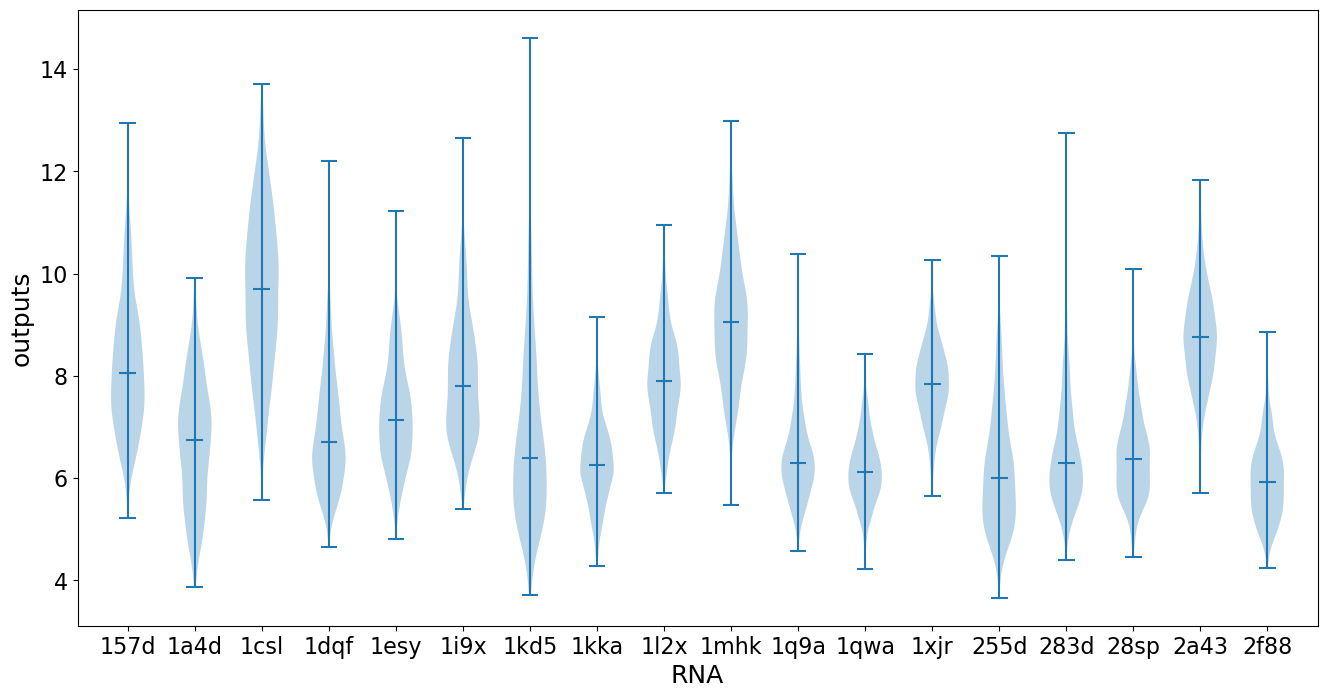

In [51]:
violin_list = []
train_RNAs = sorted(outputs.keys())
for rna in train_RNAs:
    cur = outputs[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111) 
ax.violinplot(violin_list,  showmedians=True)
set_axis_style(ax, train_RNAs, y_label='outputs')
plt.show()

In [85]:
violin_list_outputs = []
violin_list_rmsds = []
train_RNAs = sorted(outputs.keys())
for rna in train_RNAs:
    cur1 = outputs[rna]
    violin_list_outputs.append(cur1)
    cur2 = rmsds[rna]
    violin_list_rmsds.append(cur2)

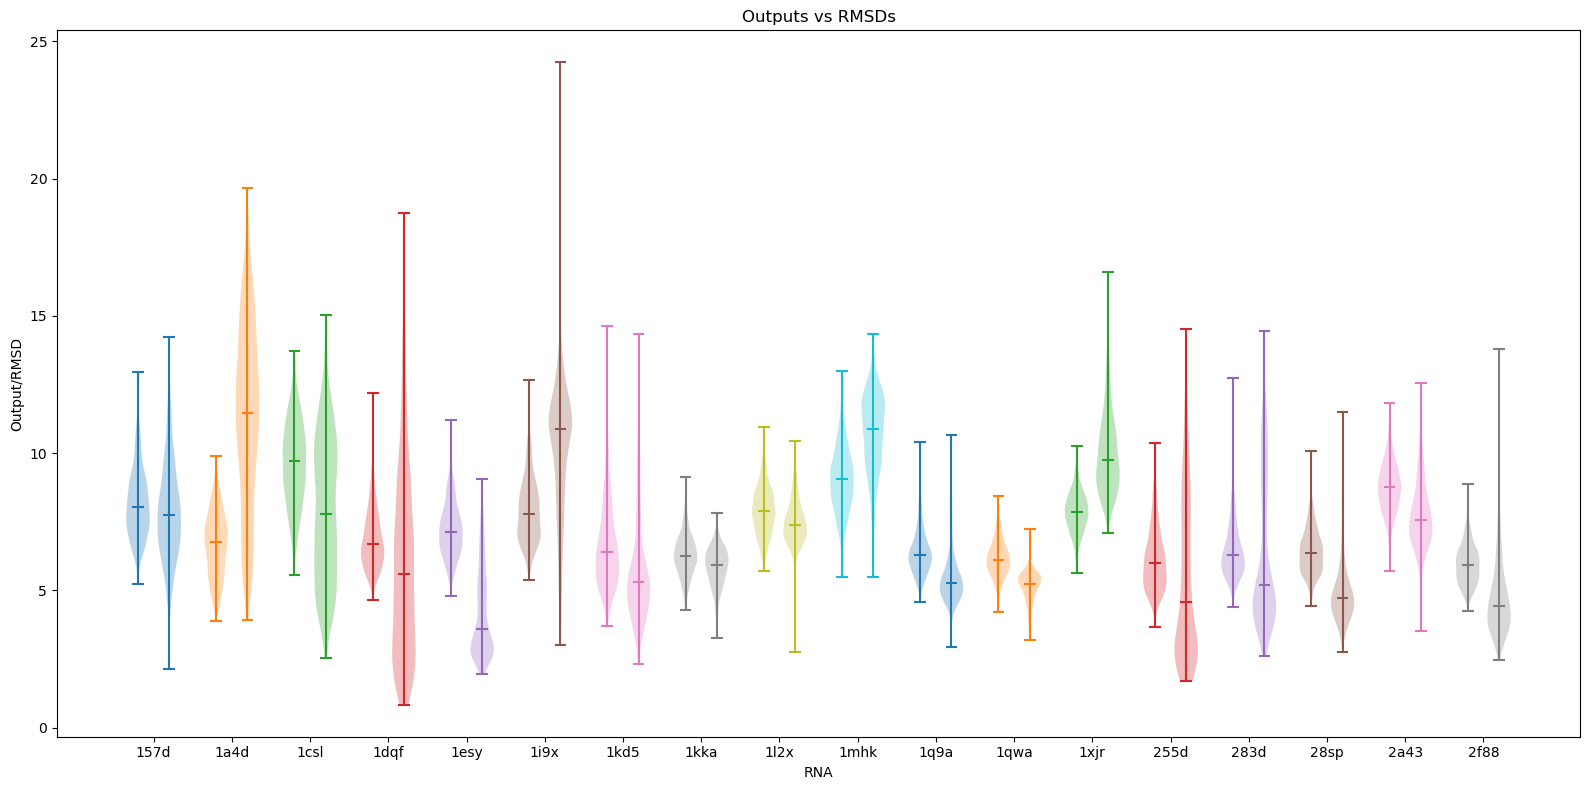

In [89]:
# Iterate through each entity
fig, ax = plt.subplots(figsize=(16, 8))
for i in range(18):
    pos = i + 1

    # Create the violin plot for the current entity with half of the violin dedicated to violin_list_outputs and the other half dedicated to violin_list_rmsds
    ax.violinplot([violin_list_outputs[i], violin_list_rmsds[i]], positions=[pos-0.2, pos+0.2], widths=0.3, showmedians=True)

    # Set the label for the x-axis
    ax.set_xticks(np.arange(1, 19))
    ax.set_xticklabels(train_RNAs)  
    
ax.set_title('Outputs vs RMSDs')
ax.set_xlabel('RNA')
ax.set_ylabel('Output/RMSD')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Loss per RNA analysis

These losses were saved in one training of model with 2 GCN layers for only 5 epochs.

In [25]:
with open('/home/martinovici/scratch/GNN_project/data/analysis/loss_per_rna.pkl', 'rb') as f:
    loss_per_rna = pickle.load(f)

In [4]:
losses = {}
epochs = 5
for i in range(epochs):
        losses[i] = {}

for key in loss_per_rna:
    rna = key[2:6]
    for i in range(epochs):
        if rna not in losses[i]:
            losses[i][rna] = []
        losses[i][rna].append(loss_per_rna[key][i])

Losses now contains dictionary for every epoch. In this dictionary per epoch, for every pdb id/for every RNA, losses for all of the 1000 structures are in an array.

In [5]:
losses[2]['1kka']

[8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 8.868543147465257,
 2.1323872860770225,
 2.1323872860770225

In [6]:
check_epoch = 2
observed_losses = losses[check_epoch]
for rna in sorted(observed_losses.keys()):
    cur = observed_losses[rna]
    print(rna)
    print('min =', np.min(cur))
    print('max =', np.max(cur))
    print('median =', np.median(cur))
    print('mean =', np.mean(cur))
    print('std =', np.std(cur))
    print()

157d
min = 4.091588973999023
max = 11.732184410095215
median = 7.116990566253662
mean = 7.239238828182221
std = 1.3030331893273472

1a4d
min = 22.384722776632962
max = 34.94657640398242
median = 27.650792198769352
mean = 28.899230151205913
std = 3.480933205265883

1csl
min = 4.091588973999023
max = 11.732184410095215
median = 7.165773153305054
mean = 7.383306155204773
std = 1.3971855967353275

1dqf
min = 4.091588973999023
max = 11.732184410095215
median = 7.192619323730469
mean = 7.385792781352997
std = 1.3233002744292097

1esy
min = 4.091588973999023
max = 11.732184410095215
median = 7.192619323730469
mean = 7.373978308677673
std = 1.2548130882318878

1i9x
min = 8.868543147465257
max = 28.374096539518945
median = 20.202607813451117
mean = 20.31616666496512
std = 3.8895117364764813

1kd5
min = 4.091588973999023
max = 11.732184410095215
median = 7.170670986175537
mean = 7.371935746192932
std = 1.283633200915701

1kka
min = 1.8277777115498228
max = 8.868543147465257
median = 2.1194540043

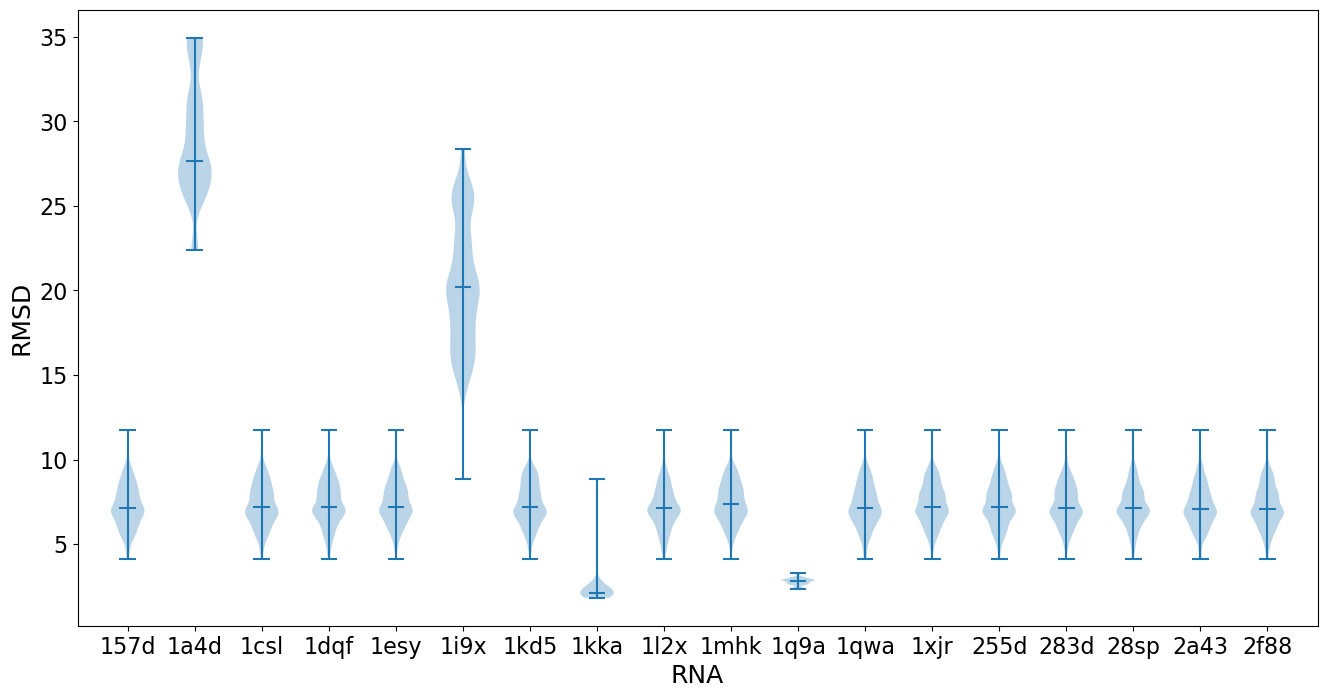

In [13]:
violin_list = []
train_RNAs = sorted(observed_losses.keys())
for rna in train_RNAs:
    cur = observed_losses[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111) 
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, train_RNAs)
plt.show()

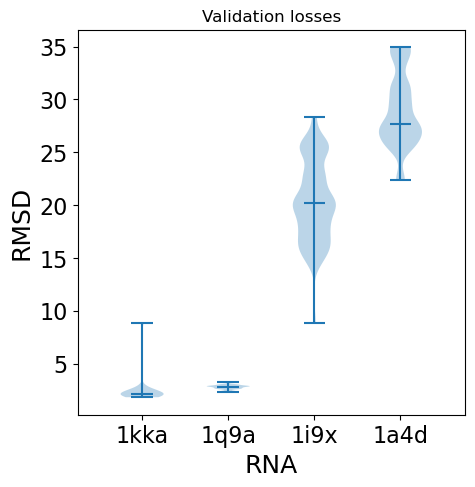

In [21]:
val = ['1kka', '1q9a', '1i9x', '1a4d']
violin_list = []
for rna in val:
    cur = observed_losses[rna]
    violin_list.append(cur)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_title('Validation losses')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, val)
plt.show()

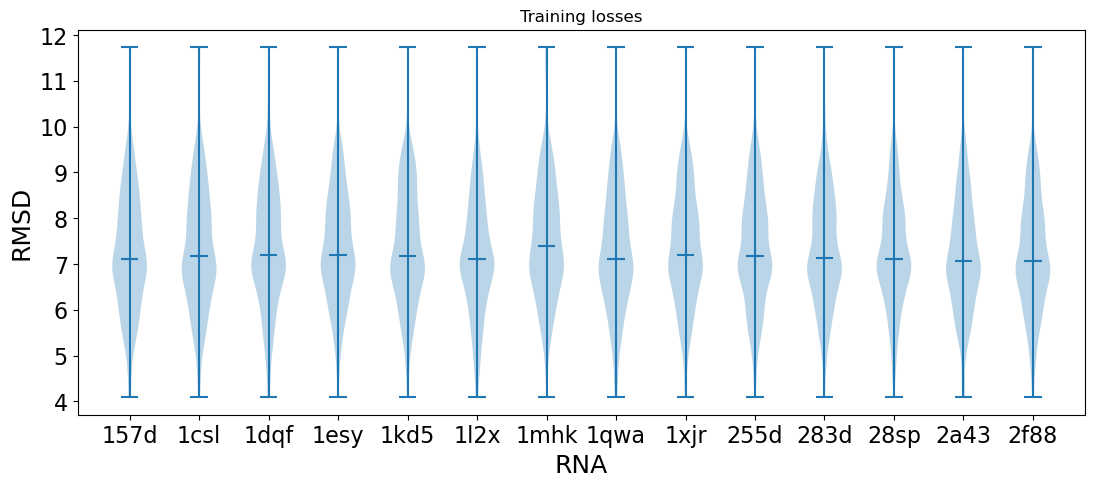

In [23]:
val = ['1kka', '1q9a', '1i9x', '1a4d']
violin_list = []
rnas = []
for rna in train_RNAs:
    if rna in val:
        continue
    cur = observed_losses[rna]
    violin_list.append(cur)
    rnas.append(rna)

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
ax.set_title('Training losses')
ax.violinplot(violin_list, showmedians=True)
set_axis_style(ax, rnas)
plt.show()